In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Read Dataset

In [2]:
loan_dt = pd.read_csv("lending_club_loan.csv")

loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [3]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
loan_dt.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Task 1.1

In [5]:
loan_dt['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

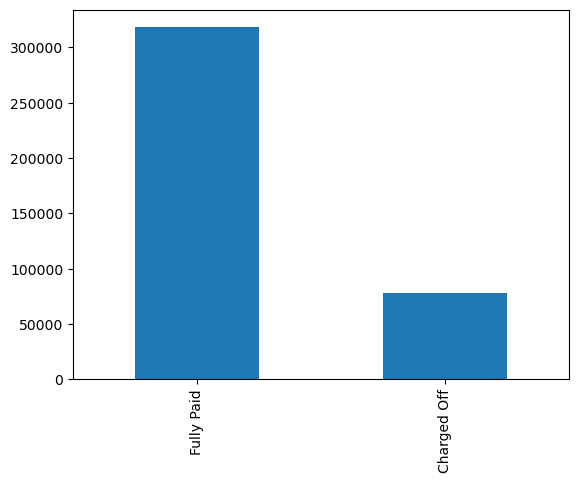

In [6]:
loan_dt['loan_status'].value_counts().plot.bar();

#### Task 1.2

In [7]:
loan_dt.describe(include=['number'])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
corr = loan_dt.corr()
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### Task 1.3

<AxesSubplot:>

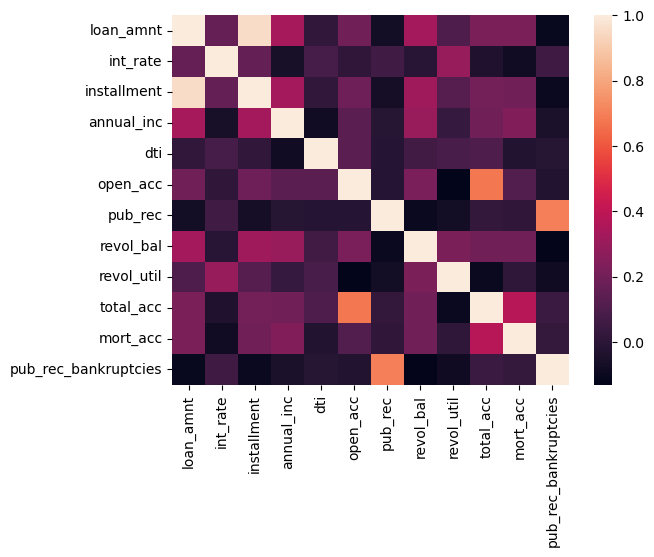

In [9]:
sns.heatmap(corr)

#### Task 1.4 : Discussion about if there are any duolication between features? 

- Instalment feature and loan_amnt are very close to correlation 1 or in other words have the lightest color in our heatmap which means they are highly correlated. Then pub_rec with Pub_rec_bankruptcies features  and open_acc and total_acc. 

#### Task 1.5

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

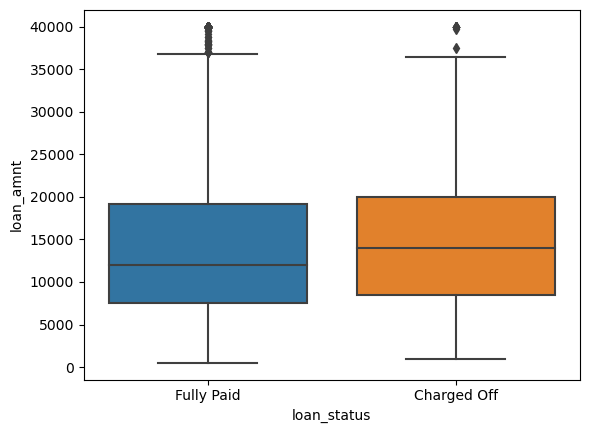

In [10]:
sns.boxplot(x=loan_dt['loan_status'], y=loan_dt['loan_amnt'],data=loan_dt )

#### Task 1.6

In [11]:
loan_dt['loan_amnt'].groupby(loan_dt['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Task 1.7

In [12]:
grade_uniq = loan_dt['grade'].unique()
grade_uniq

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [13]:
sub_grade_uniq = loan_dt['sub_grade'].unique()
sub_grade_uniq

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

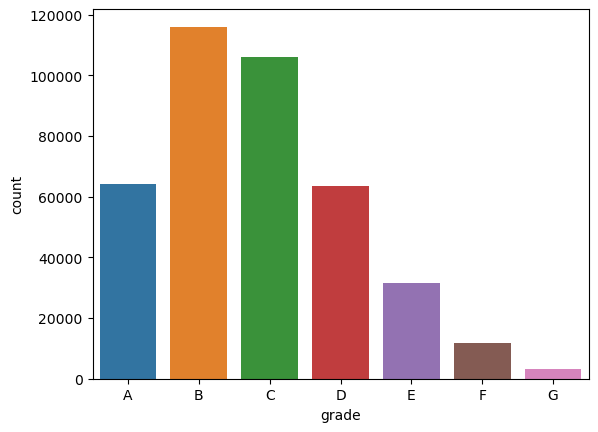

In [14]:
import matplotlib.pyplot as plt

sns.countplot(x='grade', data=loan_dt, order=sorted(grade_uniq))

#### Task 1.8

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

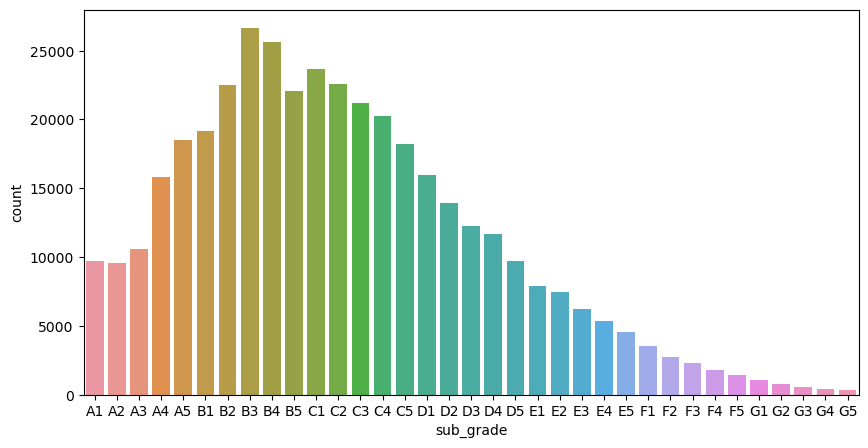

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade', data=loan_dt, order=sorted(sub_grade_uniq))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

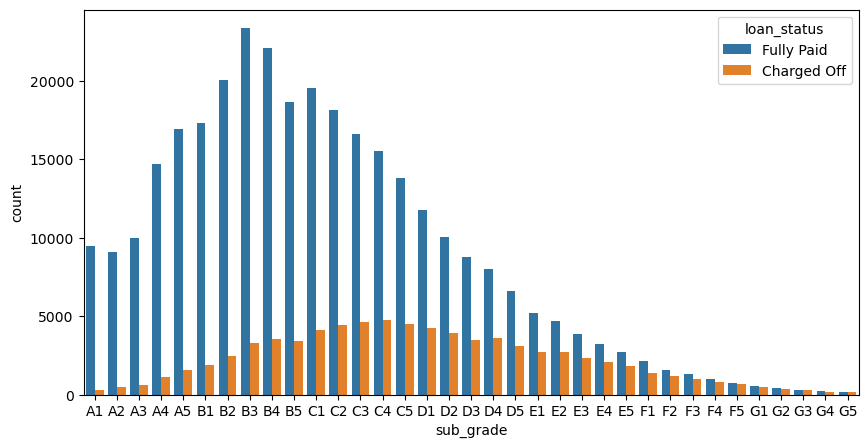

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade', data=loan_dt, hue='loan_status', order=sorted(sub_grade_uniq))

#### Task 1.9

It looks like the subgrades starting from E subgrades to G have less fully paid (blue column) loans status which means they are more likely to be charged off (organge column).

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

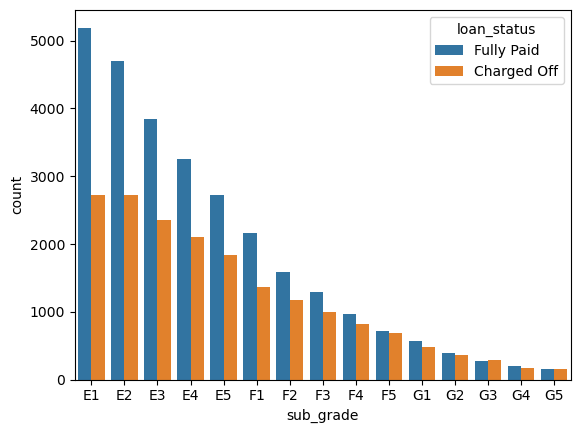

In [17]:
isolated_subgrades_dt = loan_dt[loan_dt['sub_grade'].isin(['E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])]

sns.countplot(x='sub_grade', data=isolated_subgrades_dt, hue='loan_status', order=sorted(['E1', 'E2', 'E3', 'E4','E5', 
                                                                                 'F1', 'F2', 'F3', 'F4','F5',
                                                                                 'G1', 'G2', 'G3', 'G4', 'G5']))

#### Task 1.10

In [18]:
charged_off = ['Charged Off']

loan_dt['loan_repaid'] = np.where(loan_dt['loan_status'].isin(charged_off), 0, 1)  
loan_dt.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX...",1
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723,1
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690,1
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813",1


#### Bounus Task: 

In [19]:
corr_repaid = loan_dt.corr()
corr_repaid

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.017893


In [20]:
loan_repaid_corr = corr_repaid['loan_repaid'].sort_values()
loan_repaid_corr

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

Text(0, 0.5, 'Corr with Loan Repaid')

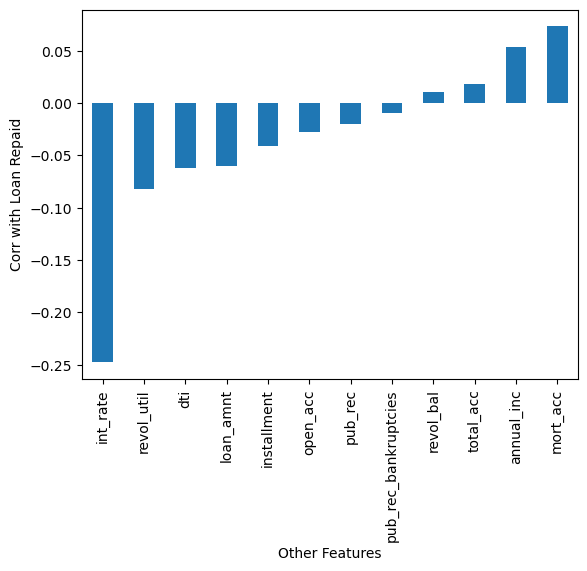

In [21]:
(loan_repaid_corr).drop('loan_repaid').plot.bar()

plt.xlabel('Other Features')
plt.ylabel('Corr with Loan Repaid')

## Task 2

#### Task 2.1

In [22]:
missing_val_bycolumn = loan_dt.isnull().sum()
missing_val_bycolumn

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [23]:
loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [24]:
categorical_columns = loan_dt.select_dtypes(exclude=['number'])
categorical_columns

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [25]:
Missing_percentage = (missing_val_bycolumn * 100)/len(loan_dt)
Missing_percentage

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### Task 2.2

In [26]:
loan_dt['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [27]:
loan_dt['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
 loan_dt['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [29]:
loan_dt['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

#### Task 2.3

C:\Users\nouf9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

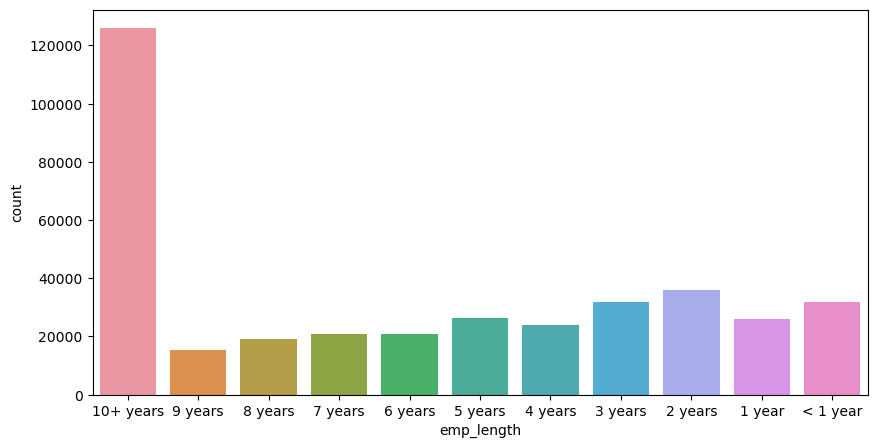

In [30]:
plt.figure(figsize=(10,5))

emp_uniq = [ '10+ years', '9 years','8 years','7 years', '6 years','5 years','4 years',
       '3 years','2 years','1 year' ,'< 1 year']

sns.countplot('emp_length', data = loan_dt, order = emp_uniq)

#### Task 2.4

<AxesSubplot:xlabel='emp_length', ylabel='count'>

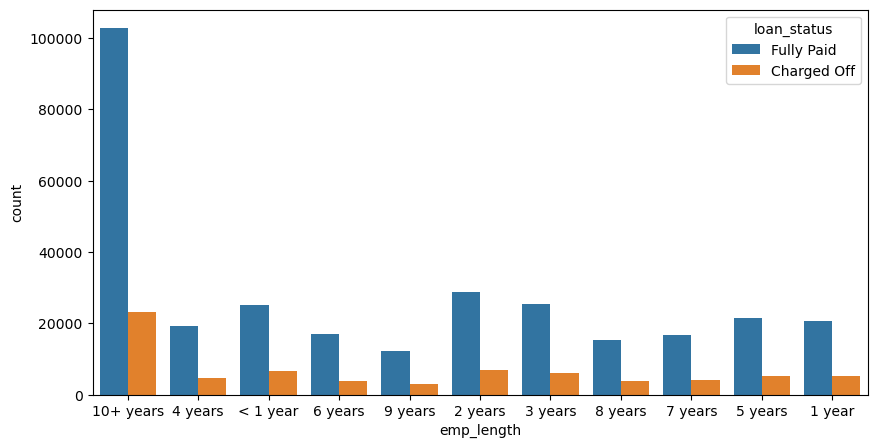

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan_dt, hue = 'loan_status') 

#### Task 2.5
What is the percentage of charge offs per category. What percent of people per employment category didn't pay back their loan?

In [32]:
total_charged_off = loan_dt[loan_dt['loan_status'] == 'Charged Off']['emp_length'].value_counts()
total_charged_off

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [33]:
total_of_length = loan_dt['emp_length'].value_counts()
total_of_length

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [34]:
charg_percent = (total_charged_off  * 100) / total_of_length
charg_percent

1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: emp_length, dtype: float64

Text(0, 0.5, 'Charge off Percentage')

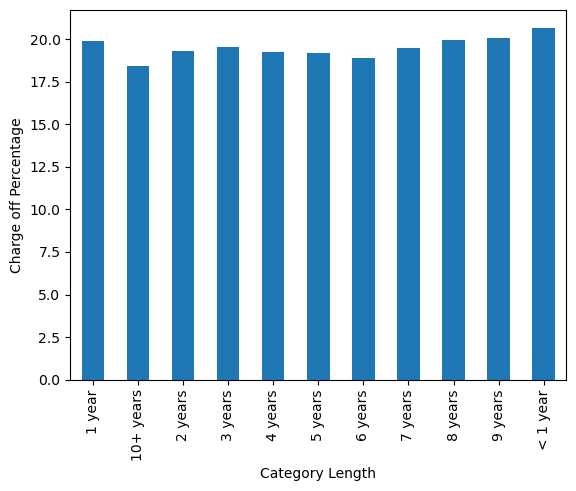

In [35]:
# par plot visualization

charg_percent.plot(kind='bar')

plt.xlabel('Category Length')
plt.ylabel('Charge off Percentage')


#### Task 2.6 : 
 **Is there any kind of relation between Charge off rates and employment lengths? Are there any chances of dropping something based on this analysis?**

There is no significant relationship to state clearly relation because almost all lengths show the same attitude towards charging off percentages and this does not give good information for future analysis so I would say dropping this column will not affect our result but it will help to clean the data set for better results while training.

In [36]:
loan_dt= loan_dt.drop('emp_length',axis =1)
loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


#### Task 2.7, 2.8

In [37]:
# Analyzing the title column and purpose column to check whether to drop or keep them
loan_dt[['title', 'purpose']].head()

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card


In [38]:
loan_dt['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [39]:
loan_dt[['title', 'purpose']].isnull().sum()

title      1755
purpose       0
dtype: int64

The title feature seems to be a duplicate or a sub-feature of purpose feature. Additionally, it has a huge amount of missing values, so it will be better to drop this feature instead of keeping it to make the data set more efficient.

In [40]:
loan_dt= loan_dt.drop('title',axis =1)

loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [41]:
loan_dt.select_dtypes(exclude=['number'])


,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [42]:
loan_dt.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Task 2.9, 2.10

In [43]:
# Create the value count of the mort_acc column 
value_count_mort = loan_dt['mort_acc'].value_counts()
value_count_mort

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

After checking the next question 2.10 I will be looking for the correlation between mort_acc and pther features first and then decide on how I should fill the missing values 

In [44]:
corr_mort = corr['mort_acc']
corr_mort

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

- Total_acc feature is the highest feature that is correlated with mort_acc with 0.38. Therefore, I can fill in the missing value by the mean of 'mort_acc' for each 'total_acc'

In [45]:
mean_total = loan_dt.groupby('total_acc').mean()['mort_acc']
mean_total

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
# Create a new column 'mort_mean'
# map 'mort_acc' with 'total_acc' 
loan_dt['mort_mean'] = loan_dt['total_acc'].map(mean_total)

# fill the mort_acc values
loan_dt['mort_acc'] = loan_dt['mort_acc'].fillna(loan_dt['mort_mean'])

loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,mort_mean
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,1.900506
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,2.103573
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,1.987414
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.722124
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,2.997056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,1.721794
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,0.308422
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,1.721794
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,1.409380


In [47]:
# drop the new column after mapping
loan_dt = loan_dt.drop('mort_mean', axis=1)
loan_dt.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,MORTGAGE,86788.0,Verified,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,MORTGAGE,125000.0,Source Verified,...,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX...",1
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,RENT,46000.0,Not Verified,...,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723,1
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,RENT,103000.0,Verified,...,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690,1
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,MORTGAGE,115000.0,Verified,...,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813",1


In [48]:
loan_dt.select_dtypes(exclude=['number'])


,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [49]:
#check that we filled the missing values 
loan_dt.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Task 2.10

Yes, we can like how I did previously 

#### Task 2.11

Yes there are missing values for both features 276 for revol_util and 535 for pub_rec_bankruptcies 

In [50]:
loan_dt['revol_util'].isnull().sum()

276

In [51]:
loan_dt['pub_rec_bankruptcies'].isnull().sum()

535

As the number of missing values is not huge comparing to the actual dataset number of data which is 396031. This means even if I delete these missing values they will not cause any bias problem in our model later on. Therefore, I will just delete these values.

In [52]:
loan_dt.dropna().isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Task 2.12

In [53]:
non_numeric_feat = loan_dt.select_dtypes(exclude=['number'])
non_numeric_feat

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


#### Task 2.13

In [54]:
uni_term = loan_dt['term'].unique()
uni_term

array([' 36 months', ' 60 months'], dtype=object)

In [55]:
# I have not used the hint way and I used my way that I have applied before in Assignment1 
loan_dt['term'] = loan_dt['term'].astype(str).fillna('0')
loan_dt['term'] = loan_dt['term'].str.extract('(\d+)').astype(int)
loan_dt

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [56]:
loan_dt.select_dtypes(exclude=['number'])

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


#### Task 2.14

In [57]:
#use encoding to replace letters with numirc values
grade_en = LabelEncoder()
loan_dt['grade'] = grade_en.fit_transform(loan_dt['grade'])

In [58]:
corr_grade = loan_dt.corrwith(loan_dt['grade'])
corr_grade

loan_amnt               0.175198
term                    0.457524
int_rate                0.952473
installment             0.157322
grade                   1.000000
annual_inc             -0.045862
dti                     0.078140
open_acc                0.019321
pub_rec                 0.068778
revol_bal              -0.008639
revol_util              0.258950
total_acc              -0.025932
mort_acc               -0.069294
pub_rec_bankruptcies    0.061583
loan_repaid            -0.257286
dtype: float64

Basically grade feature is just a repetition of sub-grade column and we can delete it without having issues. 

In [59]:
loan_dt = loan_dt.drop('grade', axis=1)
loan_dt

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,Marketing,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,Statistician,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,Client Advocate,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,licensed bankere,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C1,Agent,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B1,City Carrier,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


#### Task 2.15

In [60]:
sub_dum = pd.get_dummies(loan_dt['sub_grade'], drop_first=True)
sub_dum

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#concatenate
loan_dt = pd.concat([loan_dt, sub_dum], axis=1)

# Drop 'sub_grade'
loan_dt = loan_dt.drop('sub_grade', axis=1)

In [62]:
len(loan_dt.columns)

58

In [63]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...
396025,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


#### Task 2.16 

In [64]:
cols = ['verification_status', 'application_type', 'initial_list_status', 'purpose']

dummy = pd.get_dummies(loan_dt, columns=cols, drop_first=True)

In [65]:
loan_dt = loan_dt.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1)

In [66]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,Marketing,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...
396025,licensed bankere,RENT,Oct-2015,Fully Paid,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,MORTGAGE,Feb-2015,Fully Paid,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,RENT,Oct-2013,Fully Paid,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",MORTGAGE,Aug-2012,Fully Paid,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [67]:
loan_dt = pd.concat([loan_dt, dummy], axis=1)
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,Marketing,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,Credit analyst,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,Statistician,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,Client Advocate,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,Destiny Management Inc.,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,RENT,40000.0,Oct-2015,Fully Paid,15.63,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,Agent,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,City Carrier,RENT,56500.0,Oct-2013,Fully Paid,17.56,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,...,0,0,0,0,0,0,0,0,0,0


#### Task 2.17

In [68]:
home_count = loan_dt['home_ownership'].values
home_count

array([['RENT', 'RENT'],
       ['MORTGAGE', 'MORTGAGE'],
       ['RENT', 'RENT'],
       ...,
       ['RENT', 'RENT'],
       ['MORTGAGE', 'MORTGAGE'],
       ['RENT', 'RENT']], dtype=object)

In [69]:
loan_dt = loan_dt.iloc[:, ~loan_dt.columns.duplicated()]
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,Marketing,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,Credit analyst,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,Statistician,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,Client Advocate,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,Destiny Management Inc.,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,RENT,40000.0,Oct-2015,Fully Paid,15.63,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,Agent,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,City Carrier,RENT,56500.0,Oct-2013,Fully Paid,17.56,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,...,0,0,0,0,0,0,0,0,0,0


In [70]:
loan_dt['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

#### Task 2.18

In [71]:
loan_dt['home_ownership'] = loan_dt['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

C:\Users\nouf9\AppData\Local\Temp\ipykernel_37428\3935031403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dt['home_ownership'] = loan_dt['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')


In [72]:
home_dumm = pd.get_dummies(loan_dt['home_ownership'], drop_first=False)
home_dumm

,MORTGAGE,OTHER,OWN,RENT
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
396025,0,0,0,1
396026,1,0,0,0
396027,0,0,0,1
396028,1,0,0,0


In [73]:
loan_dt = pd.concat([loan_dt, home_dumm], axis=1)
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,Marketing,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,1,0,0,0,0,1
1,8000.0,36,11.99,265.68,Credit analyst,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,1,0,0,0
2,15600.0,36,10.49,506.97,Statistician,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,Client Advocate,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,Destiny Management Inc.,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,RENT,40000.0,Oct-2015,Fully Paid,15.63,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,Agent,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,...,0,0,0,0,0,0,1,0,0,0
396027,5000.0,36,9.99,161.32,City Carrier,RENT,56500.0,Oct-2013,Fully Paid,17.56,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,...,0,0,0,0,0,0,1,0,0,0


In [74]:
# Drop home_ownership 
loan_dt = loan_dt.drop('home_ownership', axis=1)

In [75]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title,issue_d,loan_status,earliest_cr_line,address
0,Marketing,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...
396025,licensed bankere,Oct-2015,Fully Paid,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,Feb-2015,Fully Paid,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,Oct-2013,Fully Paid,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",Aug-2012,Fully Paid,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


#### Task 2.19 

In [76]:
loan_dt['zip_code'] = loan_dt['address'].str[-5:]
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,Marketing,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,1,0,0,0,0,1,22690
1,8000.0,36,11.99,265.68,Credit analyst,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,1,0,0,0,05113
2,15600.0,36,10.49,506.97,Statistician,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,1,05113
3,7200.0,36,6.49,220.65,Client Advocate,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,1,00813
4,24375.0,60,17.27,609.33,Destiny Management Inc.,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,1,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,1,30723
396026,21000.0,36,12.29,700.42,Agent,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,1,0,0,0,05113
396027,5000.0,36,9.99,161.32,City Carrier,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,1,70466
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,1,0,0,0,29597


#### Task 2.20

In [77]:
#get dummy variables 
zip_dum = pd.get_dummies(loan_dt['zip_code'], drop_first=False)
zip_dum 

,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,1,0,0,0,0
396026,0,1,0,0,0,0,0,0,0,0
396027,0,0,0,0,0,0,0,1,0,0
396028,0,0,0,0,1,0,0,0,0,0


In [78]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 76 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int32  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   emp_title                            373103 non-null  object 
 5   annual_inc                           396030 non-null  float64
 6   issue_d                              396030 non-null  object 
 7   loan_status                          396030 non-null  object 
 8   dti                                  396030 non-null  float64
 9   earliest_cr_line                     396030 non-null  object 
 10  open_acc                             396030 non-null  float64
 11  pub_rec      

In [79]:
#concatonate
loan_dt = pd.concat([loan_dt, zip_dum], axis=1)

In [80]:
loan_dt = loan_dt.drop(['zip_code', 'address','loan_status'], axis=1)
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,annual_inc,issue_d,dti,earliest_cr_line,open_acc,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,Marketing,117000.0,Jan-2015,26.24,Jun-1990,16.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,Credit analyst,65000.0,Jan-2015,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,Statistician,43057.0,Jan-2015,12.79,Aug-2007,13.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,Client Advocate,54000.0,Nov-2014,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,Destiny Management Inc.,55000.0,Apr-2013,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,40000.0,Oct-2015,15.63,Nov-2004,6.0,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,Agent,110000.0,Feb-2015,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,City Carrier,56500.0,Oct-2013,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",64000.0,Aug-2012,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title,issue_d,earliest_cr_line
0,Marketing,Jan-2015,Jun-1990
1,Credit analyst,Jan-2015,Jul-2004
2,Statistician,Jan-2015,Aug-2007
3,Client Advocate,Nov-2014,Sep-2006
4,Destiny Management Inc.,Apr-2013,Mar-1999
...,...,...,...
396025,licensed bankere,Oct-2015,Nov-2004
396026,Agent,Feb-2015,Feb-2006
396027,City Carrier,Oct-2013,Mar-1997
396028,"Gracon Services, Inc",Aug-2012,Nov-1990


#### Task 2.21

In [82]:
#Extract year and set it to a new column in the dataset
loan_dt['earliest_cr_year'] = pd.to_datetime(loan_dt['earliest_cr_line']).dt.year
loan_dt['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 396030, dtype: int64

In [83]:
# delte the earliest_cr_line
loan_dt = loan_dt.drop('earliest_cr_line', axis=1)
loan_dt

,loan_amnt,term,int_rate,installment,emp_title,annual_inc,issue_d,dti,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,Marketing,117000.0,Jan-2015,26.24,16.0,0.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,Credit analyst,65000.0,Jan-2015,22.05,17.0,0.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,Statistician,43057.0,Jan-2015,12.79,13.0,0.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,Client Advocate,54000.0,Nov-2014,2.60,6.0,0.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,Destiny Management Inc.,55000.0,Apr-2013,33.95,13.0,0.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,licensed bankere,40000.0,Oct-2015,15.63,6.0,0.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,Agent,110000.0,Feb-2015,21.45,6.0,0.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,City Carrier,56500.0,Oct-2013,17.56,15.0,0.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,"Gracon Services, Inc",64000.0,Aug-2012,15.88,9.0,0.0,...,0,0,0,1,0,0,0,0,0,1990


In [84]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title,issue_d
0,Marketing,Jan-2015
1,Credit analyst,Jan-2015
2,Statistician,Jan-2015
3,Client Advocate,Nov-2014
4,Destiny Management Inc.,Apr-2013
...,...,...
396025,licensed bankere,Oct-2015
396026,Agent,Feb-2015
396027,City Carrier,Oct-2013
396028,"Gracon Services, Inc",Aug-2012


In [85]:
loan_dt = loan_dt.drop('issue_d', axis=1)

In [86]:
loan_dt.select_dtypes(exclude=['number'])

,emp_title
0,Marketing
1,Credit analyst
2,Statistician
3,Client Advocate
4,Destiny Management Inc.
...,...
396025,licensed bankere
396026,Agent
396027,City Carrier
396028,"Gracon Services, Inc"


In [87]:
loan_dt = loan_dt.drop('emp_title', axis=1)

In [88]:
loan_dt

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


In [89]:
loan_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int32  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   revol_util                           395754 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

In [90]:
len(loan_dt.columns)

81

## Task 3 

#### Task 3.1

In [91]:
X = loan_dt.drop('loan_repaid', axis=1).values
y = loan_dt['loan_repaid'].values

## Task 4

#### Task 4.1 

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [93]:
len(X_train)

316824

In [94]:
#Source 1 : I have leanred and retreived mask implementetion to drop all the NAN values on my train and test data 
mask = ~np.isnan(X_train).any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

In [95]:
#Source 1 : I have leanred and retreived mask implementetion to drop all the NAN values on my train and test data 
mask_test = ~np.isnan(X_test).any(axis=1)
X_test = X_test[mask_test]
y_test = y_test[mask_test]

#### Task 4.2

In [96]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Task 5

#### Task 5.1

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [98]:
seq_model = Sequential()

In [99]:
#input layer
seq_model.add(Dense(64, activation='relu', input_shape=(80,)))  
seq_model.add(Dropout(0.3))

# hidden layer
seq_model.add(Dense(35, activation='relu'))

# output
seq_model.add(Dense(1, activation='sigmoid'))

# Compile 
seq_model.compile(optimizer='adam', loss='binary_crossentropy')


seq_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5184      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 35)                2275      
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 7,495
Trainable params: 7,495
Non-trainable params: 0
_________________________________________________________________


#### Task 5.2

In [100]:
fit_ANN = seq_model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))
fit_ANN

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2941 - val_loss: 0.2615
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2630 - val_loss: 0.2598
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2615 - val_loss: 0.2594
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2610 - val_loss: 0.2596
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2603 - val_loss: 0.2593
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2599 - val_loss: 0.2594
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2594 - val_loss: 0.2597
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2591 - val_loss: 0.2585
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2591 - val_loss: 0.2582
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.258

#### Task 5.3

In [101]:
from tensorflow.keras.models import load_model
seq_model.save("seq_model.h5")

## Task 6 

#### Task 6.1

In [102]:
#Retrieve the training loss and validation using history function 
train_loss = fit_ANN.history['loss']
val_loss = fit_ANN.history['val_loss']

In [103]:
train_loss

[0.2940945327281952,
 0.2630191743373871,
 0.2615029811859131,
 0.2609681189060211,
 0.26027804613113403,
 0.2598690092563629,
 0.2594435214996338,
 0.2591310739517212,
 0.259097158908844,
 0.258691668510437,
 0.258459210395813,
 0.2584114372730255,
 0.2581665515899658,
 0.25800594687461853,
 0.25771379470825195,
 0.25766390562057495,
 0.25749707221984863,
 0.2575366199016571,
 0.25735896825790405,
 0.2570914924144745,
 0.25697213411331177,
 0.25687193870544434,
 0.25676557421684265,
 0.2566923201084137,
 0.25656893849372864]

Text(0, 0.5, 'Loss')

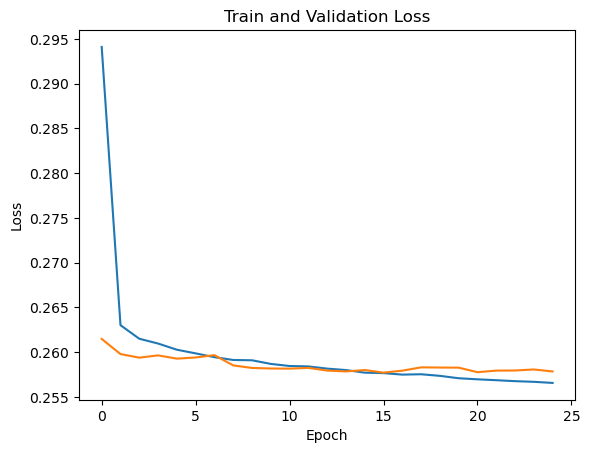

In [104]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Adding title and labels
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

#### Task 6.2

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

pred = seq_model.predict(X_test)

2471/2471 [==============================] - 2s 974us/step


In [106]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [107]:
# diplay classification_report

# I needed to convert it to birnary predection using threshold which is 0.5 in this case 
#otherwise the classification report will not be able to disaply because my actual y_test values are binary 0,1 (charged off, fully paied)

pred = (pred > 0.5).astype(int)

print("classification_report:")
print(classification_report(y_test, pred))

classification_report:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62     15462
           1       0.88      0.99      0.93     63580

    accuracy                           0.89     79042
   macro avg       0.91      0.73      0.78     79042
weighted avg       0.89      0.89      0.87     79042



In [108]:
## diplay Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[ 7100  8362]
 [  427 63153]]


#### Task 6.3

In [109]:
import random

random.seed(101)
random_ind = random.randint(0,len(loan_dt))
new_customer = loan_dt.drop('loan_repaid',axis=1).iloc[random_ind]

In [111]:
new_customer
seq_model.predict(new_customer.values.reshape(1,80))

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

#### Task 6.4

In [112]:
#Check if the person end up paying their loan 
loan_dt.iloc[random_ind]['loan_repaid']

1.0

Our randomly selected customer label is 1, which indicates that this random customer fully paid their loan, which matches our actual dataset. Therefore, we could conclude that the model is learning well during training and is accurate. 